In [10]:
import math
import pandas as pd
import matplotlib.pyplot as plt
# pd.options.plotting.backend = "plotly"

In [ ]:
def psi(A,B,SOC):
    return A* ((1-SOC)**B)

psi(0.000274,2.1,0.5)

6.39127599202713e-05

In [ ]:
A = 0.000274
B = 2.1

n_breakpoints = 5
n_segments = n_breakpoints - 1

points_list = []
alpha_beta_pairs = []

for i in range(n_breakpoints):
    # (SOC, psi)
    points_list.append((i/n_segments, psi(A, B, i/n_segments)))

for j in range(n_segments):
    alpha = (points_list[j+1][1] - points_list[j][1]) / (points_list[j+1][0] - points_list[j][0])
    beta = points_list[j][1] - alpha * points_list[j][0]
    alpha_beta_pairs.append((alpha, beta))
print(alpha_beta_pairs)

[(-0.0004969829179274153, 0.000274), (-0.0003433660423914995, 0.00023559578111602105), (-0.00019601832609530072, 0.00016192192296792166), (-5.963271358578449e-05, 5.963271358578449e-05)]


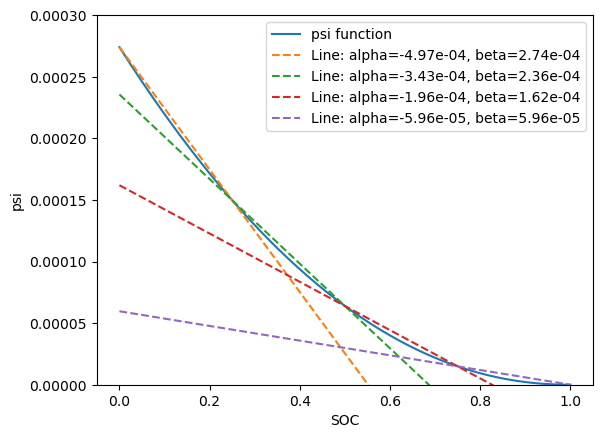

In [ ]:
import numpy as np

# Generate 200 sample points for SOC
SOC_values = np.linspace(0, 1, 200)
psi_values = [psi(A, B, soc) for soc in SOC_values]

# Extract the SOC and psi values from points_list
SOC_points, psi_points = zip(*points_list)

# Plot the function psi
plt.plot(SOC_values, psi_values, label='psi function')

# Plot the 5 points linear approximation
# plt.scatter(SOC_points, psi_points, color='red', label='Linear Approximation Points')

# Add labels and legend
# Plot the linear segments
for alpha, beta in alpha_beta_pairs:
    plt.plot(SOC_values, alpha * SOC_values + beta, linestyle='--', label=f'Line: alpha={alpha:.2e}, beta={beta:.2e}')

plt.xlabel('SOC')
plt.ylabel('psi')
plt.ylim(0, 0.0003)
plt.legend()
plt.show()